In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Read the XLSX files into DataFrames
history_tinder = pd.read_excel(r'Data\Tinder.xlsx', sheet_name = 'Tinder', header = 0)
history_tinder['service'] = 'tinder'
history_bumble = pd.read_excel(r'Data\Bumble.xlsx', sheet_name = 'Bumble', header = 0)
history_bumble['service'] = 'bumble'
history_okcupid = pd.read_excel(r'Data\OkCupid.xlsx', sheet_name = 'OkCupid', header = 0)
history_okcupid['service'] = 'okcupid'
history_plentyoffish = pd.read_excel(r'Data\Plenty of Fish.xlsx', sheet_name = 'Plenty of Fish', header = 0)
history_plentyoffish['service'] = 'plenty of fish'
# Strip the shit from Bubmle's AGE column
history_bumble['AGE'] = history_bumble['AGE'].str.strip(", ")
# Merge the DataFrames into one
frames = [history_bumble, history_okcupid, history_plentyoffish, history_tinder]
historyDF = pd.concat(frames)
# Get the date for today and convert it to a string
dateToday = datetime.now().strftime("%Y-%m-%d")
# Create a dictionary of DataFrames to plot with FOR loops
history = {}
services = ['Tinder', 'Bumble', 'OkCupid', 'Plenty of Fish']
# Create each DataFrame within the dictionary
for i in services:
    history[i] = pd.read_excel(r'Data\{}.xlsx'.format(i), sheet_name = i, header = 0)
    history[i]['SERVICE'] = i
# Export CSV for all services
historyDF.to_csv('Data\All Services.csv', index = False)
# Define a function to show values
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.5
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
# Set Seaborn theme and other attributes for all the figures
sns.set_theme(style = "darkgrid")

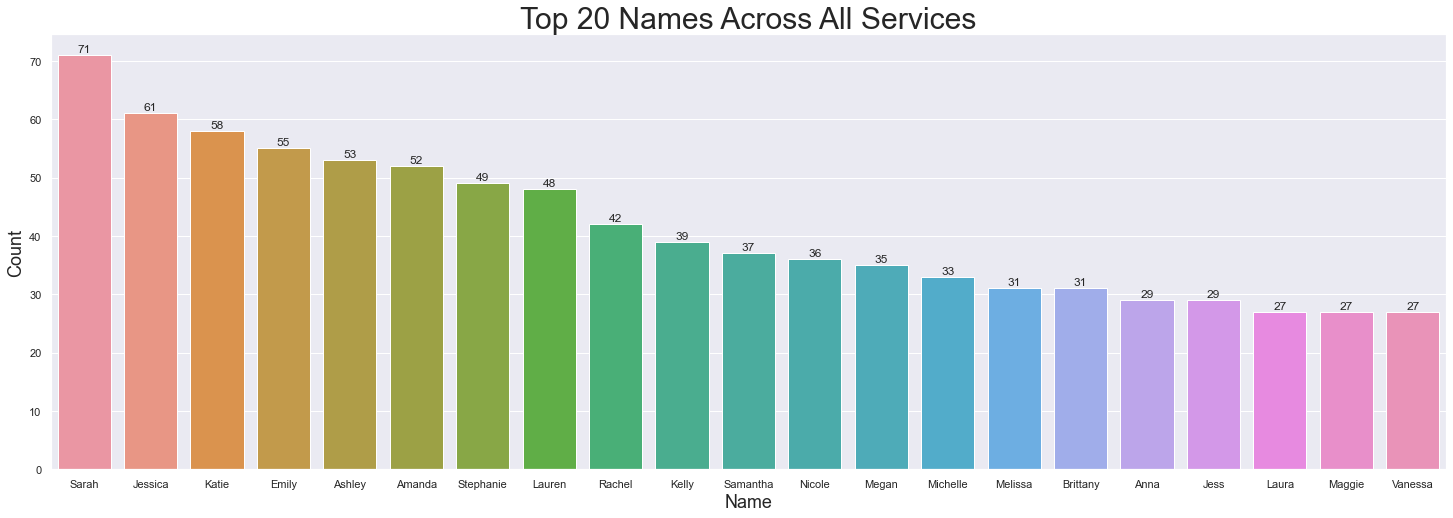

In [4]:
names_top_20 = historyDF.groupby(['NAME']).count().sort_values('STATUS', ascending = False)[0:21]
# Plot the date distribution
plt.figure(figsize=(25,8))
allNameTop20 = sns.barplot(x = names_top_20.index, y = "STATUS", data = names_top_20, )
allNameTop20.set_title("Top 20 Names Across All Services", size = 30)
allNameTop20.set_xlabel("Name", size = 18)
allNameTop20.set_ylabel("Count", size = 18)
show_values_on_bars(allNameTop20)

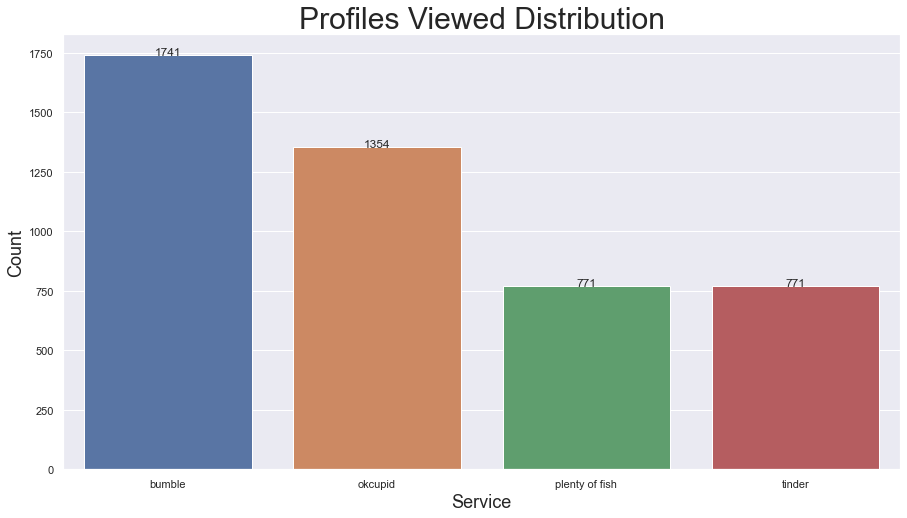

In [34]:
# Plot all service count
plt.figure(figsize=(15,8))
serviceCount = sns.countplot(x = "service", data = historyDF)
serviceCount.set_title("Profiles Viewed Distribution", size = 30)
serviceCount.set_xlabel("Service", size = 18)
serviceCount.set_ylabel("Count", size = 18)
show_values_on_bars(serviceCount)

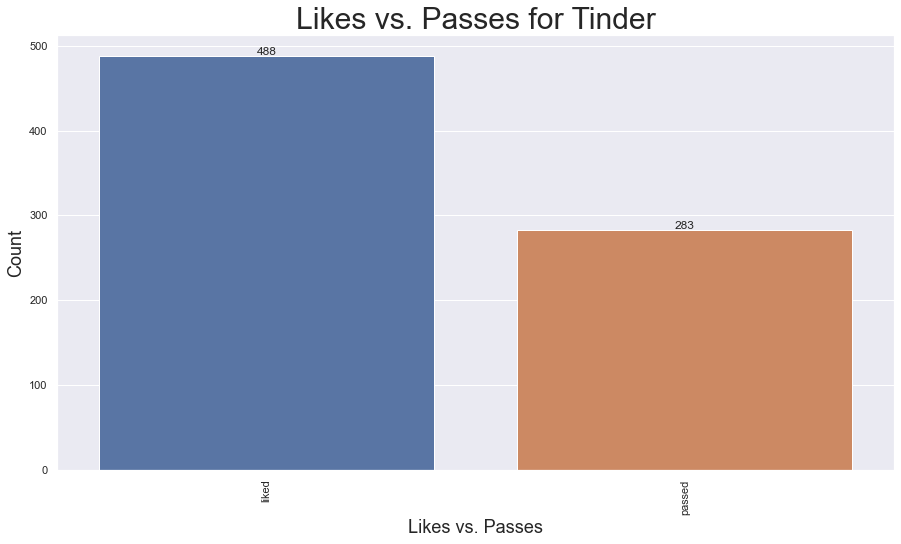

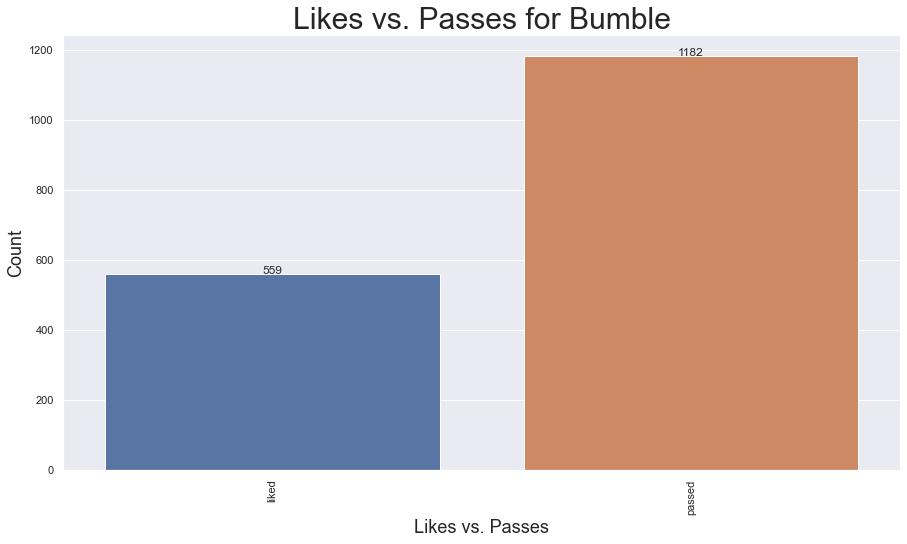

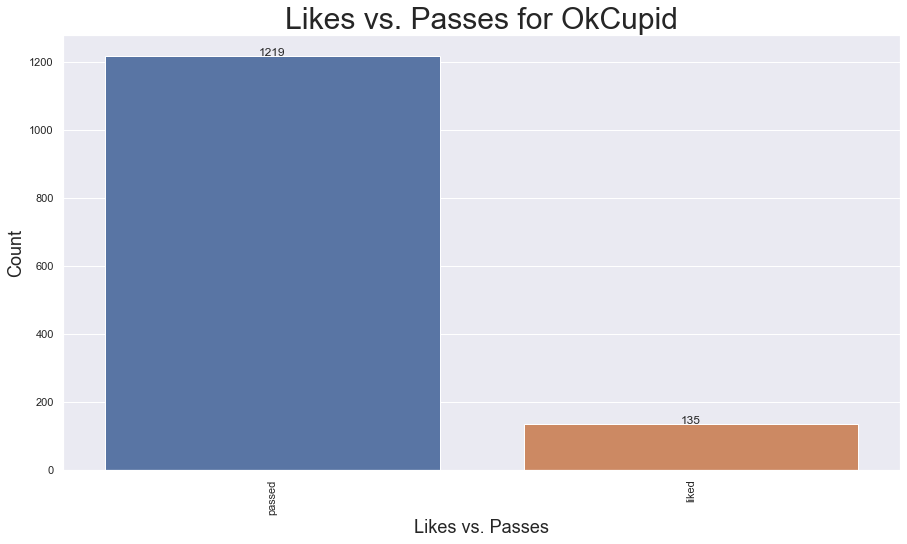

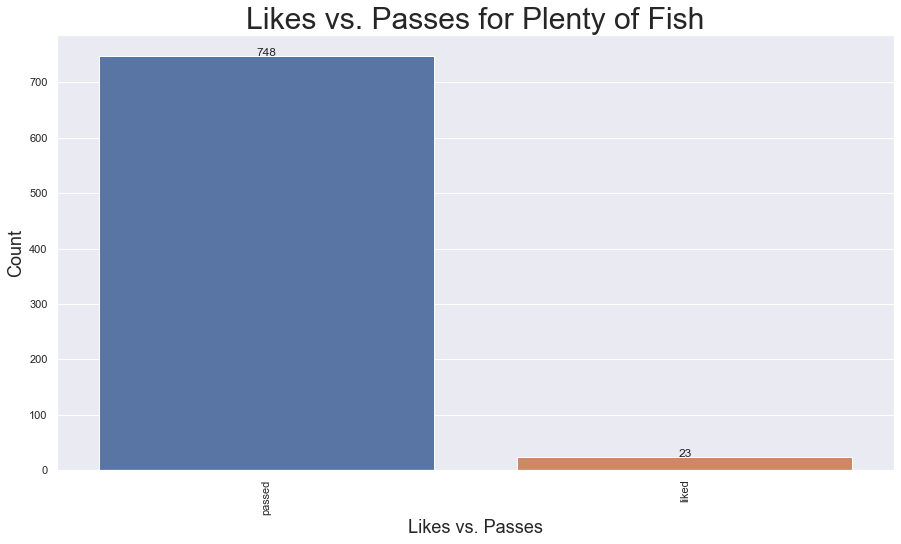

In [35]:
status = {}
# Plot Likes vs. Passes for all services
for i in services:
    plt.figure(figsize=(15,8))
    status[i] = sns.countplot(x = "STATUS", data = history[i])
    status[i].set_xticklabels(status[i].get_xticklabels(), rotation=90)
    status[i].set_title("Likes vs. Passes for {}".format(i), size = 30)
    status[i].set_xlabel("Likes vs. Passes", size = 18)
    status[i].set_ylabel("Count", size = 18)
    show_values_on_bars(status[i])

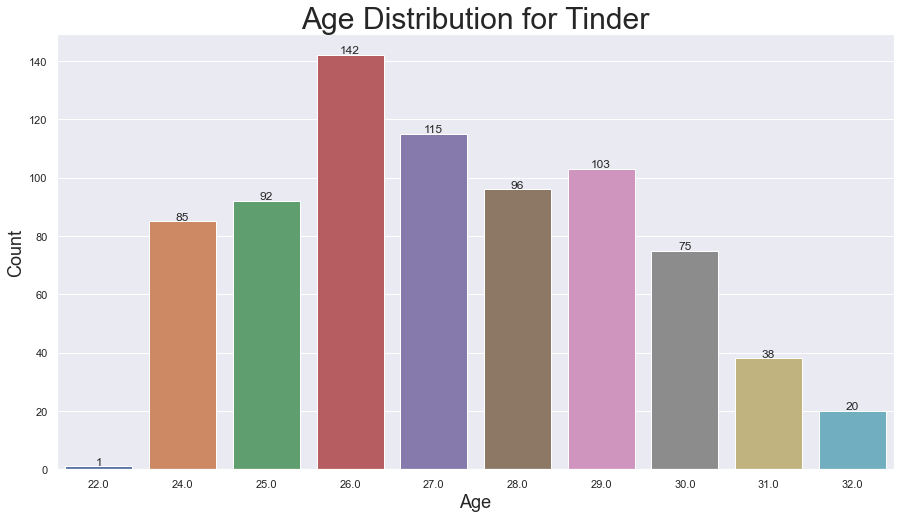

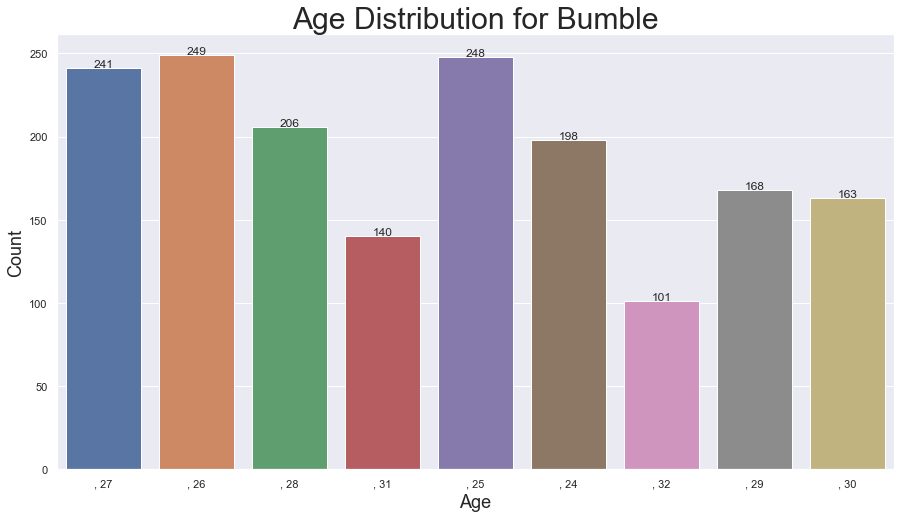

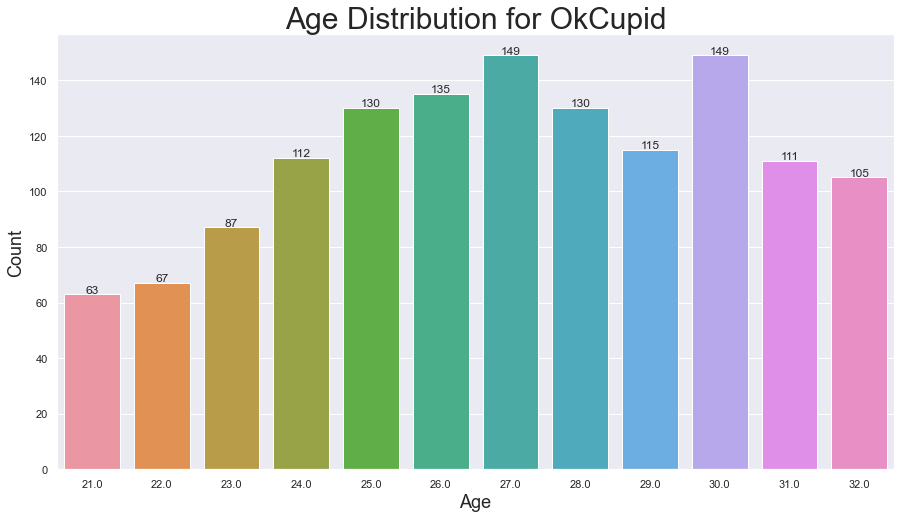

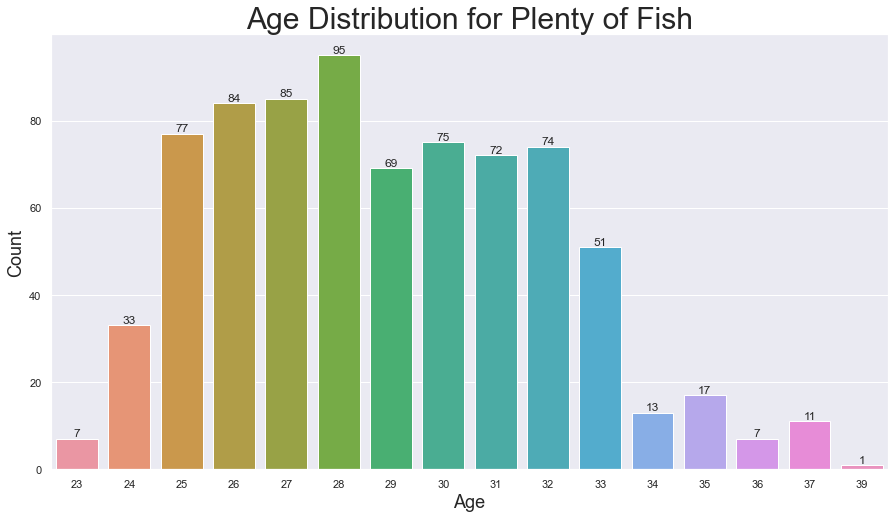

In [38]:
age = {}
for i in services:
    # Plot ages for each service
    plt.figure(figsize=(15,8))
    age[i] = sns.countplot(x = "AGE", data = history[i])
    age[i].set_title("Age Distribution for {}".format(i), size = 30)
    age[i].set_xlabel("Age", size = 18)
    age[i].set_ylabel("Count", size = 18)
    show_values_on_bars(age[i])